___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [80]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [81]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [82]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [83]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [84]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

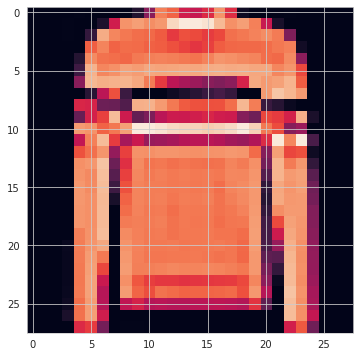

In [85]:
plt.imshow(X_train[5]);

In [86]:
y_train[5]

2

In [87]:
y_train.shape

(60000,)

In [88]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [89]:
np.unique(y_train, return_counts=True)
# --> her bir unique degerin kacar tane oldugunu göster

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [90]:
pd.Series(y_train.flatten()).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [91]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

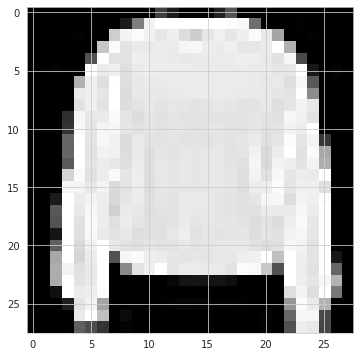

In [92]:
plt.imshow(X_train[7], cmap='gray');

In [93]:
y_train[7]

2

In [94]:
classes[2]

'Pullover'

In [95]:
classes[int(y_train[7])]

'Pullover'

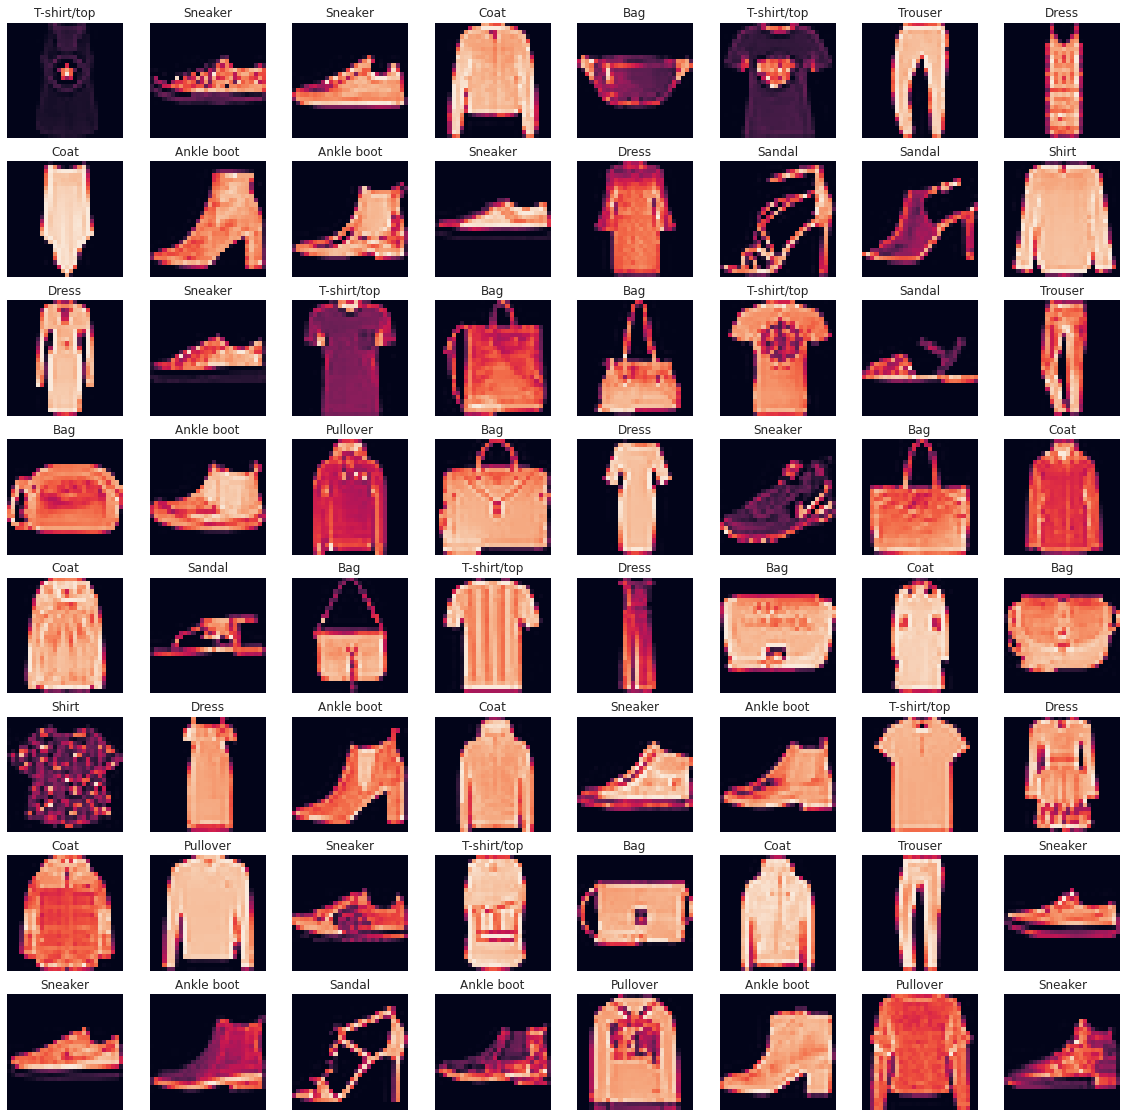

In [96]:
plt.figure(figsize=(20, 20))
for i in range(64): 
    rand_index = int(np.random.randint(low=0, high=60000, size=1)) 
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [97]:
X_train[7].min()

0

In [98]:
X_train[7].max()

255

In [99]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Normalize image pixels
# 0 ile 255 arasindaki degerleri 0 ile 1 arasina cektik

In [100]:
X_train[7].min()

0.0

In [101]:
X_train[7].max()

1.0

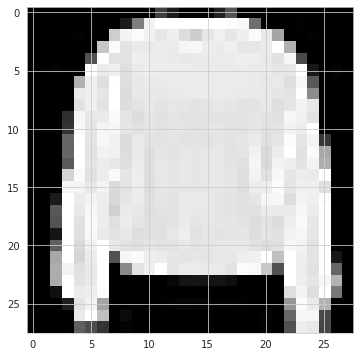

In [102]:
plt.imshow(X_train[7], cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [103]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [104]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [105]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [106]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [107]:
y_train # her bir rakami 0 ve 1 lerden olusan bir diziye dönüstürmeliyiz

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [108]:
from tensorflow.keras.utils import to_categorical

In [109]:
Y_train = to_categorical(y_train,10) # her bir rakami 0 ve 1 lerden olusan bir diziye dönüstürüyoruz, 10 basamakli
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [110]:
Y_train.shape

(60000, 10)

In [111]:
y_train[0]

9

In [112]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [113]:
from tensorflow.keras.models import Sequential # sequential ---> ardarda gelen, dense ---> fully connected layers, conv2d ---> 2 boyutlu convolutional
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [128]:
model = Sequential()
# resimler büyük degilse kernel 3,3 secilebilir, büyük resimlerde 7,7 secilebilir ama sonlara dogru yine 3,3 e düsülmeli
# input_shape X_train shapinden geliyor!
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
# iki pooling iki convolution kullandik, bunu degistirerek deneyebilirsin
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# en son cikisi 10 yaptik cünkü 10 adet classimiz var 
model.compile(loss='categorical_crossentropy', # multiclass oldugu icin categorical_crossentropy
              optimizer='rmsprop',
              metrics=['accuracy'])

In [129]:
model.summary() 
# dersteki örnekte strides=(1,1) kullanmamistik, o zaman pooling katmaninda yari yariya kücülmüstü resimler

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 25, 25, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 22, 22, 28)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 13552)             0         
                                                                 
 dense_22 (Dense)            (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [123]:
from tensorflow.keras.callbacks import EarlyStopping

In [130]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [131]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 21s 5ms/step - loss: 0.4004 - accuracy: 0.8553 - val_loss: 0.2997 - val_accuracy: 0.8935
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2618 - accuracy: 0.9051 - val_loss: 0.3074 - val_accuracy: 0.8900
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2325 - accuracy: 0.9178 - val_loss: 0.3235 - val_accuracy: 0.9031


In [ ]:
model.metrics_names

In [132]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.400,0.855,0.300,0.893
1,0.262,0.905,0.307,0.890
2,0.232,0.918,0.324,0.903


**TASK 7: Plot values of metrics you used in your model.**

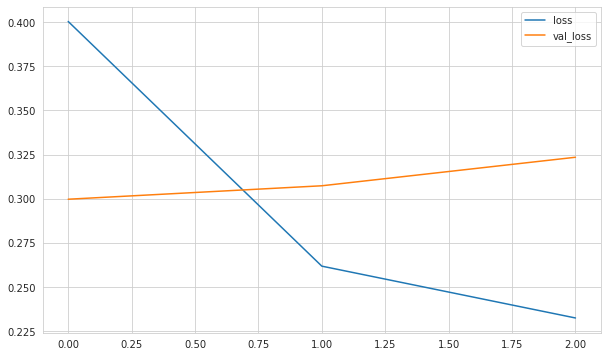

In [133]:
summary[["loss", "val_loss"]].plot(); 

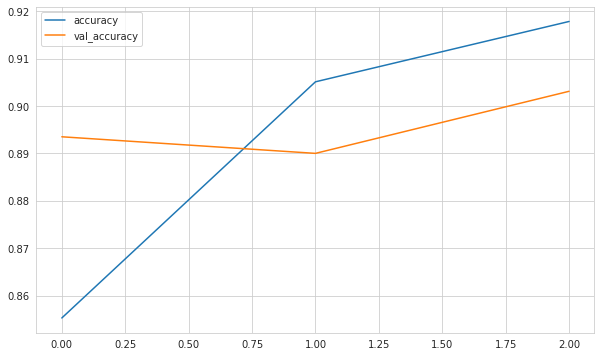

In [134]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.8935


[0.29973649978637695, 0.8934999704360962]

In [137]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29973649978637695
Test accuracy: 0.8934999704360962


In [138]:
pred_prob = model.predict(X_test)
pred_prob

array([[2.8807815e-08, 2.6279628e-07, 1.3557331e-08, ..., 1.6082360e-03,
        2.5322910e-07, 9.9828136e-01],
       [7.7493300e-05, 8.0174929e-11, 9.9950862e-01, ..., 6.1877647e-10,
        7.5457581e-07, 2.4279542e-08],
       [2.6550254e-07, 9.9999821e-01, 2.2328934e-09, ..., 1.9801161e-07,
        1.7962940e-08, 7.8679790e-08],
       ...,
       [2.8024479e-06, 1.5486269e-10, 1.4172069e-07, ..., 1.7426107e-09,
        9.9999201e-01, 2.2164923e-09],
       [3.7532111e-09, 9.9999976e-01, 8.0816586e-12, ..., 1.6703519e-08,
        4.6105073e-10, 2.9321964e-08],
       [3.3584367e-03, 1.0313664e-04, 6.9411099e-04, ..., 2.2077704e-02,
        5.9268814e-02, 4.8289686e-03]], dtype=float32)

In [139]:
y_pred = np.argmax(pred_prob, axis=1) # maximum olanin indexini döndürüyor

In [140]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.87      0.82      1000
           3       0.88      0.93      0.90      1000
           4       0.82      0.77      0.80      1000
           5       0.97      0.98      0.98      1000
           6       0.77      0.63      0.70      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [142]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [143]:
print(confusion_matrix(y_test, y_pred))

[[882   2  20  19   6   2  62   0   7   0]
 [  2 965   0  24   5   0   2   0   2   0]
 [ 12   1 874   8  54   1  48   0   2   0]
 [ 15   2   9 930  23   0  19   0   2   0]
 [  1   1 131  41 773   1  48   0   4   0]
 [  0   0   0   0   0 982   0  12   0   6]
 [158   1  91  32  73   1 631   0  13   0]
 [  0   0   0   0   0  13   0 971   0  16]
 [  2   0   7   4   3   2   5   2 975   0]
 [  0   0   0   0   0   7   0  41   0 952]]


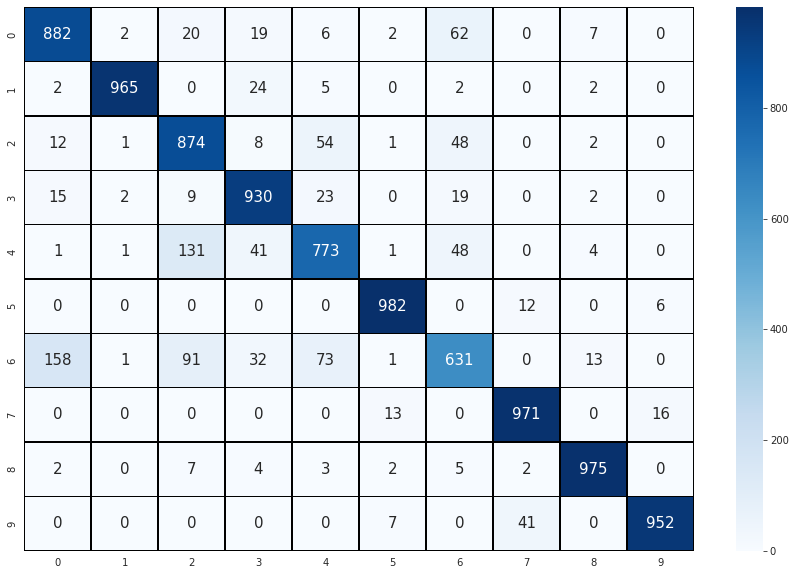

In [144]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## With Dropout:

In [145]:
model_d = Sequential()
model_d.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model_d.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model_d.add(Dropout(0.4)) 

model_d.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model_d.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model_d.add(Dropout(0.4)) 

model_d.add(Flatten())

model_d.add(Dense(128, activation='relu'))
model_d.add(Dense(64, activation='relu'))
model_d.add(Dense(10, activation='softmax'))
# en son cikisi 10 yaptik cünkü 10 adet classimiz var 
model_d.compile(loss='categorical_crossentropy', # multiclass oldugu icin categorical_crossentropy
              optimizer='rmsprop',
              metrics=['accuracy'])

In [146]:
model_d.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 28)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 25, 25, 28)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 22, 22, 28)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 28)       

In [147]:
model_d.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4574 - accuracy: 0.8330 - val_loss: 0.4341 - val_accuracy: 0.8752
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3193 - accuracy: 0.8869 - val_loss: 0.3317 - val_accuracy: 0.8891
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2979 - accuracy: 0.8941 - val_loss: 0.3604 - val_accuracy: 0.8697
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2875 - accuracy: 0.8983 - val_loss: 0.3017 - val_accuracy: 0.8913
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2823 - accuracy: 0.9008 - val_loss: 0.2986 - val_accuracy: 0.8921
Epoch 6/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2826 - accuracy: 0.9011 - val_loss: 0.4264 - val_accuracy: 0.8881
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2785 - accuracy: 0.9023 - val_loss: 0.3317 - val_accuracy

In [148]:
model_d.metrics_names

['loss', 'accuracy']

In [152]:
summary_d = pd.DataFrame(model_d.history.history)
summary_d

,loss,accuracy,val_loss,val_accuracy
0,0.457,0.833,0.434,0.875
1,0.319,0.887,0.332,0.889
2,0.298,0.894,0.360,0.870
3,0.287,0.898,0.302,0.891
4,0.282,0.901,0.299,0.892
5,0.283,0.901,0.426,0.888
6,0.279,0.902,0.332,0.899


In [153]:
summary

,loss,accuracy,val_loss,val_accuracy
0,0.400,0.855,0.300,0.893
1,0.262,0.905,0.307,0.890
2,0.232,0.918,0.324,0.903


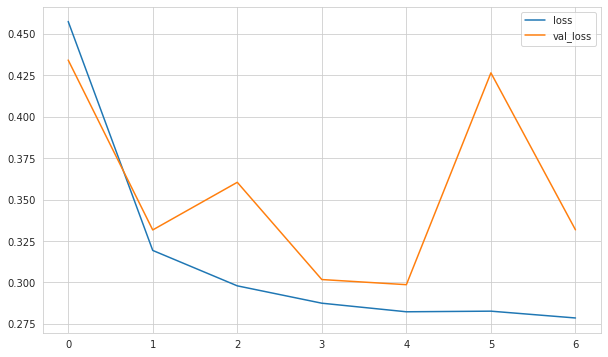

In [154]:
summary_d[["loss", "val_loss"]].plot(); 

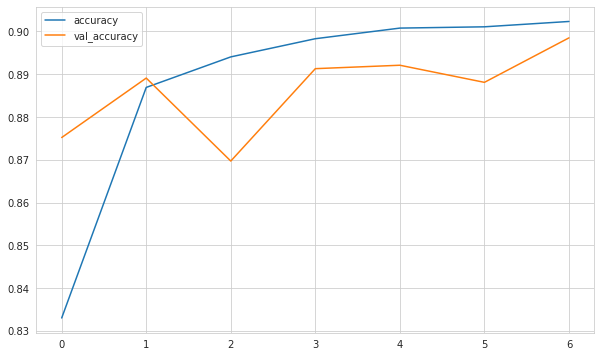

In [155]:
summary_d[["accuracy", "val_accuracy"]].plot();

In [156]:
model_d.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2986 - accuracy: 0.8921


[0.29862743616104126, 0.8920999765396118]

In [157]:
score = model_d.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29862743616104126
Test accuracy: 0.8920999765396118


In [160]:
pred_prob = model_d.predict(X_test)
pred_prob

array([[3.83084592e-10, 1.85321029e-11, 1.94016960e-12, ...,
        1.18943362e-05, 9.17070586e-10, 9.99920607e-01],
       [2.21276769e-05, 3.06702974e-09, 9.93537843e-01, ...,
        6.28608537e-12, 2.93537141e-07, 1.73800654e-10],
       [3.47292400e-04, 9.97953534e-01, 9.12930773e-05, ...,
        1.68343217e-06, 2.01573653e-06, 1.24249496e-07],
       ...,
       [3.28942610e-06, 1.45641520e-11, 1.00019996e-07, ...,
        7.15393370e-11, 9.99993682e-01, 5.93839995e-12],
       [1.86103009e-08, 9.99998450e-01, 1.24601414e-08, ...,
        1.25433064e-09, 1.52864787e-11, 1.64277453e-10],
       [1.64633000e-03, 8.82062013e-04, 2.48722383e-04, ...,
        5.78985475e-02, 9.25804581e-03, 2.93718409e-02]], dtype=float32)

In [161]:
y_pred = np.argmax(pred_prob, axis=1)

In [162]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.89      0.85      1000
           3       0.89      0.90      0.89      1000
           4       0.83      0.83      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.66      0.72      0.69      1000
           7       0.96      0.95      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



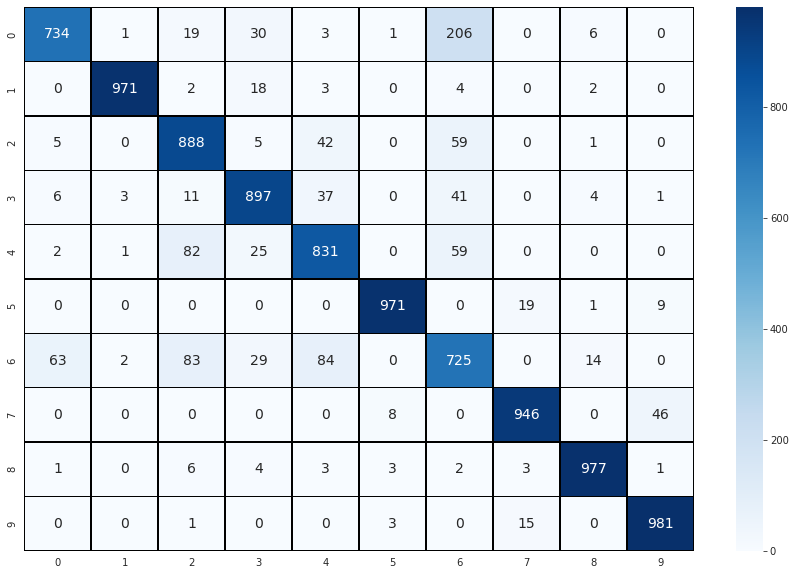

In [164]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

bazi class lar icin düzelme varken bazilari kötülesti

## With BatchNormalization:





In [165]:
from tensorflow.keras.layers import BatchNormalization

In [166]:
model_b = Sequential()
model_b.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model_b.add(BatchNormalization())
model_b.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model_b.add(Dropout(0.4)) 

model_b.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model_b.add(BatchNormalization())
model_b.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))
model_b.add(Dropout(0.4)) 

model_b.add(Flatten())

model_b.add(Dense(128, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(Dropout(0.4)) 
model_b.add(Dense(64, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(Dropout(0.4)) 
model_b.add(Dense(10, activation='softmax'))
# en son cikisi 10 yaptik cünkü 10 adet classimiz var 
model_b.compile(loss='categorical_crossentropy', # multiclass oldugu icin categorical_crossentropy
              optimizer='rmsprop',
              metrics=['accuracy'])

In [167]:
model_b.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 28)       112       
 ormalization)                                                   
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 25, 25, 28)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 25, 25, 28)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 23, 23, 28)        7084      
                                                                 
 batch_normalization_1 (Batc  (None, 23, 23, 28)      

In [168]:
model_b.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5423 - accuracy: 0.8187 - val_loss: 0.3377 - val_accuracy: 0.8792
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3687 - accuracy: 0.8743 - val_loss: 0.3293 - val_accuracy: 0.8856
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3311 - accuracy: 0.8897 - val_loss: 0.3280 - val_accuracy: 0.8738
Epoch 4/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3090 - accuracy: 0.8952 - val_loss: 0.2970 - val_accuracy: 0.8919
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2948 - accuracy: 0.9016 - val_loss: 0.2817 - val_accuracy: 0.8983
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2819 - accuracy: 0.9060 - val_loss: 0.2369 - val_accuracy: 0.9161
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2761 - accuracy: 0.9078 - val_loss: 0.2358 - val_ac

In [169]:
summary_b = pd.DataFrame(model_b.history.history)
summary_b

,loss,accuracy,val_loss,val_accuracy
0,0.542,0.819,0.338,0.879
1,0.369,0.874,0.329,0.886
2,0.331,0.890,0.328,0.874
3,0.309,0.895,0.297,0.892
4,0.295,0.902,0.282,0.898
5,0.282,0.906,0.237,0.916
6,0.276,0.908,0.236,0.917
7,0.266,0.912,0.265,0.904
8,0.260,0.914,0.306,0.891


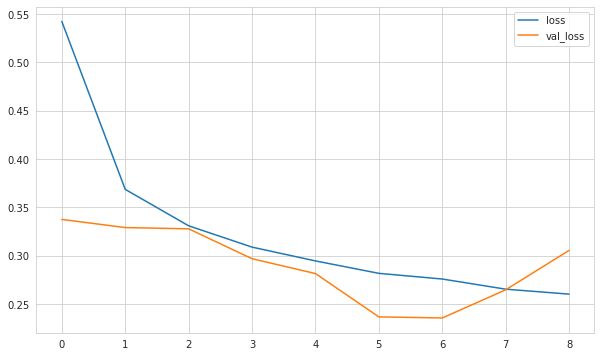

In [170]:
summary_b[["loss", "val_loss"]].plot();

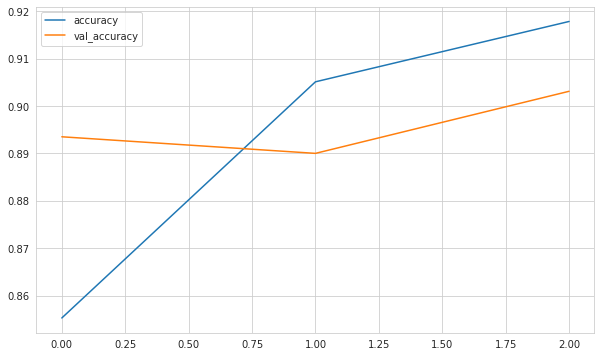

In [171]:
summary[["accuracy", "val_accuracy"]].plot();

In [172]:
model_b.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2358 - accuracy: 0.9169


[0.23581090569496155, 0.9168999791145325]

In [174]:
score = model_b.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23581090569496155
Test accuracy: 0.9168999791145325


dropout ile test accuracy = 0,89 idi.

In [175]:
pred_prob = model.predict(X_test)

In [176]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.87      0.82      1000
           3       0.88      0.93      0.90      1000
           4       0.82      0.77      0.80      1000
           5       0.97      0.98      0.98      1000
           6       0.77      0.63      0.70      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



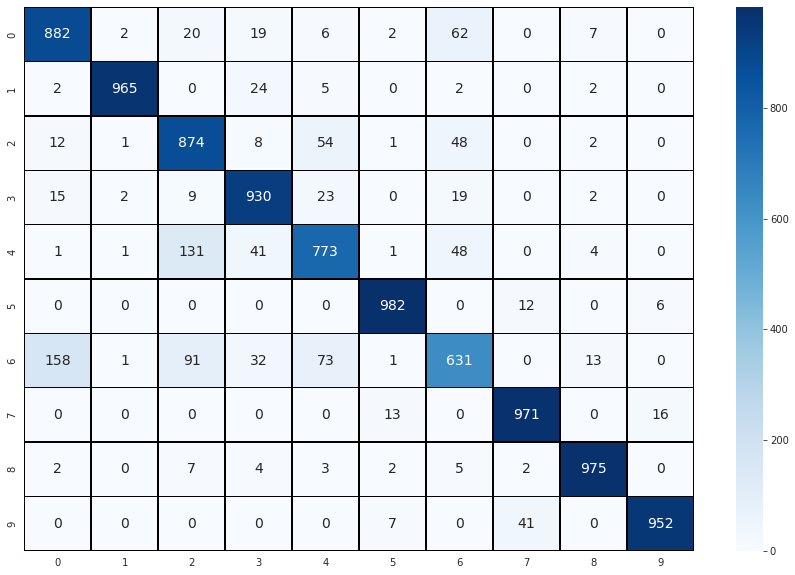

In [178]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [179]:
my_image = X_test[73]
my_image.shape

(28, 28, 1)

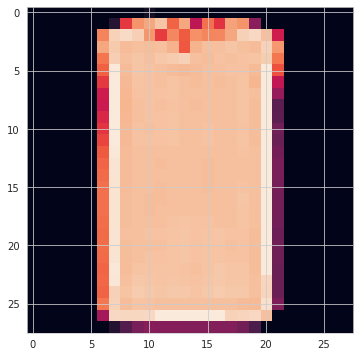

In [185]:
plt.imshow(my_image.reshape(28,28));

In [187]:
image_prediction = model_b.predict(my_image.reshape(1,28,28,1))

In [188]:
image_prediction

array([[2.5190544e-01, 3.2335738e-04, 6.6979535e-02, 7.7481940e-03,
        7.9403846e-03, 1.4784613e-04, 6.6357017e-01, 2.0312314e-04,
        2.6459954e-04, 9.1740722e-04]], dtype=float32)

In [189]:
np.argmax(image_prediction, axis=1)

array([6])

In [190]:
result=np.argmax(image_prediction, axis=1)

In [191]:
classes[int(result)] 

'Shirt'

In [192]:
model_b.save("cnn_2.h5")

In [194]:
model_new=tf.keras.models.load_model('cnn_2.h5')

In [195]:
X_test[15].shape

(28, 28, 1)

In [196]:
np.expand_dims(X_test[15],axis=0).shape

(1, 28, 28, 1)

In [197]:
pred=model_new.predict(np.expand_dims(X_test[15],axis=0))

In [198]:
classes[int(np.argmax(pred))]

'Trouser'

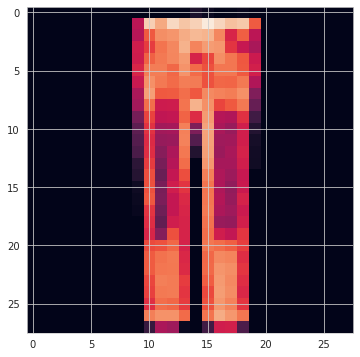

In [199]:
plt.imshow(X_test[15].reshape(28,28));

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___